In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('C:\mehdi dossier\Cours Master Org M1-S2\Machine Learning\TP\Datasets\\forestfires.csv')

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
df.describe(include=['O'])

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


<AxesSubplot:>

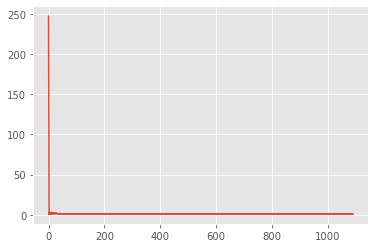

In [9]:
target= df['area']
df['area'].value_counts().plot()

In [5]:
from matplotlib import pyplot as plt

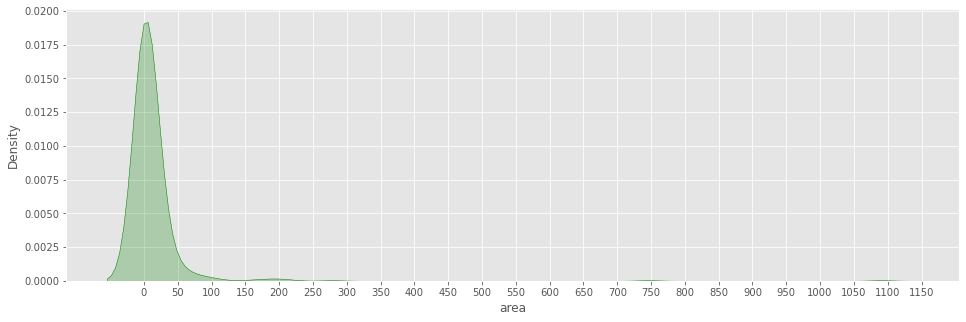

In [6]:
plt.figure(figsize=(16,5))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

Skew :12.846933533934868
Kurtsis:194.1407210942299


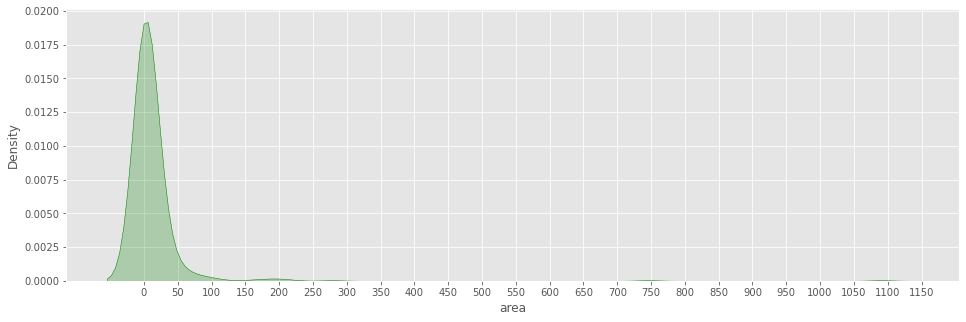

In [7]:
plt.figure(figsize=(16,5))
print("Skew :{}".format(df['area'].skew()))
print("Kurtsis:{}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [ ]:
#On Observe que les incendies sont élevées dans les régions ayant moins du surfaces (moins de 50 hectares)

In [10]:
dfa = df.drop(columns='area')
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

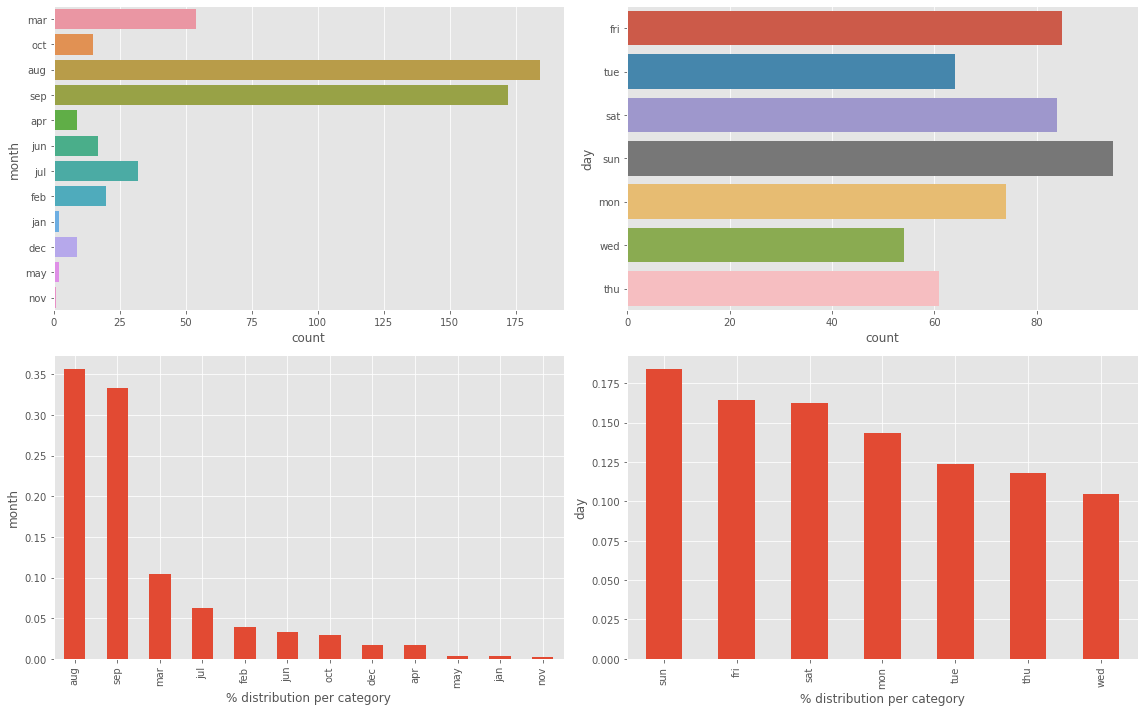

In [11]:
#Analyse des colonnes catégorials
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
#Il est clair qu'un nombre anormalement élevé d'incendies de forêt se produit en mois août et septembre.

#On observe que les jours du vendredi au lundi ont un pourcentage de cas plus élevé.

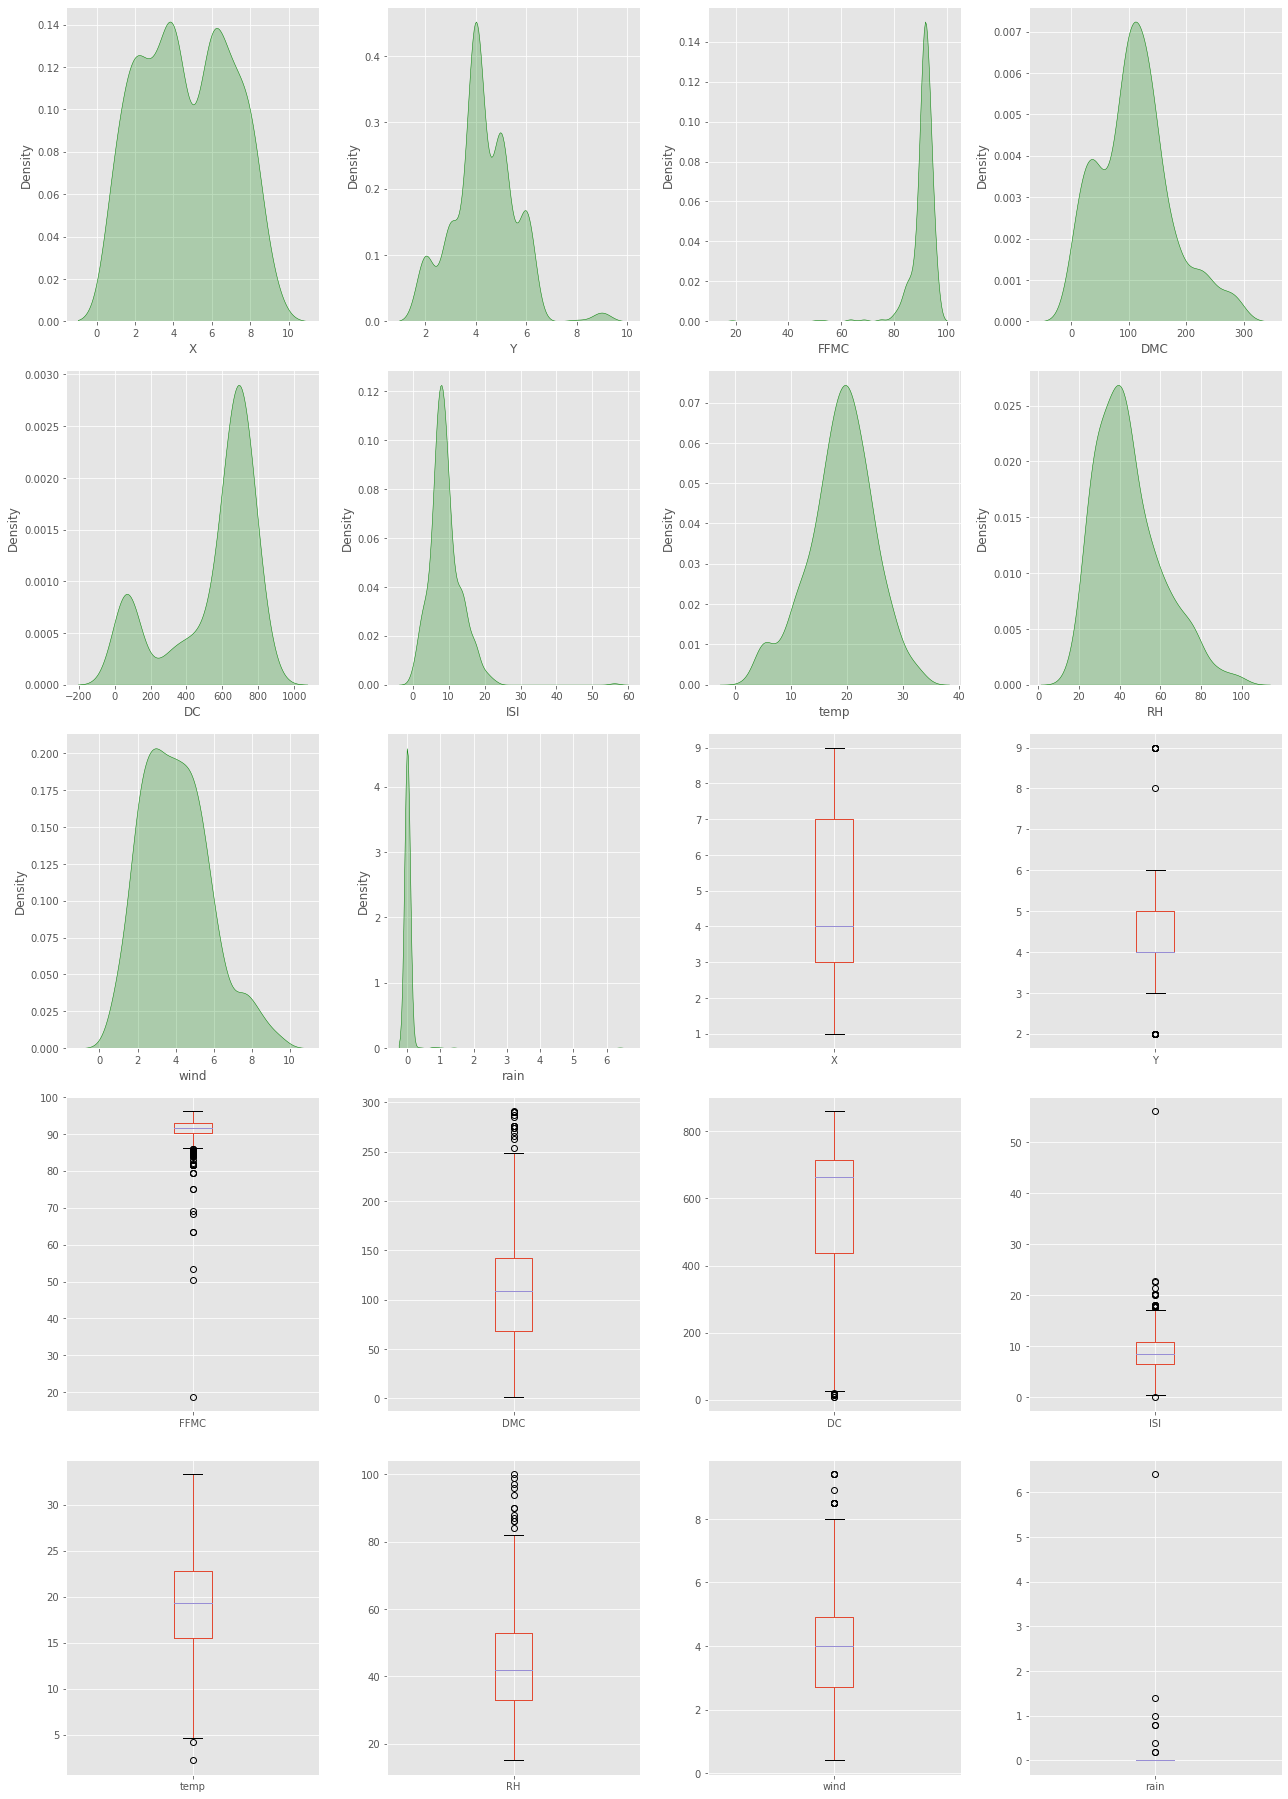

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [12]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [ ]:
#On observe des valeurs aberrantes dans les colonnes suivantes : FFMC,ISI,rain. 

In [13]:
df[df['area']==0]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [ ]:
#Il y a 247 enregistrements qui ont des 0 dans la colonne 'area'

In [14]:
df['area'].unique()

array([0.00000e+00, 3.60000e-01, 4.30000e-01, 4.70000e-01, 5.50000e-01,
       6.10000e-01, 7.10000e-01, 7.70000e-01, 9.00000e-01, 9.50000e-01,
       9.60000e-01, 1.07000e+00, 1.12000e+00, 1.19000e+00, 1.36000e+00,
       1.43000e+00, 1.46000e+00, 1.56000e+00, 1.61000e+00, 1.63000e+00,
       1.64000e+00, 1.69000e+00, 1.75000e+00, 1.90000e+00, 1.94000e+00,
       1.95000e+00, 2.01000e+00, 2.14000e+00, 2.29000e+00, 2.51000e+00,
       2.53000e+00, 2.55000e+00, 2.57000e+00, 2.69000e+00, 2.74000e+00,
       3.07000e+00, 3.50000e+00, 4.53000e+00, 4.61000e+00, 4.69000e+00,
       4.88000e+00, 5.23000e+00, 5.33000e+00, 5.44000e+00, 6.38000e+00,
       6.83000e+00, 6.96000e+00, 7.04000e+00, 7.19000e+00, 7.30000e+00,
       7.40000e+00, 8.24000e+00, 8.31000e+00, 8.68000e+00, 8.71000e+00,
       9.41000e+00, 1.00100e+01, 1.00200e+01, 1.09300e+01, 1.10600e+01,
       1.12400e+01, 1.13200e+01, 1.15300e+01, 1.21000e+01, 1.30500e+01,
       1.37000e+01, 1.39900e+01, 1.45700e+01, 1.54500e+01, 1.720

In [17]:
def area_cat(area):
    if area == 0.0:
        return "Aucun Dommage"
    elif area <= 1:
        return "faible"
    elif area <= 25:
        return "modérer"
    elif area <= 100:
        return "élevé"
    else:
        return "très élevé"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,Aucun Dommage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,Aucun Dommage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,Aucun Dommage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,Aucun Dommage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,Aucun Dommage


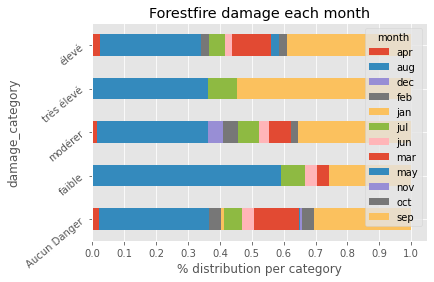

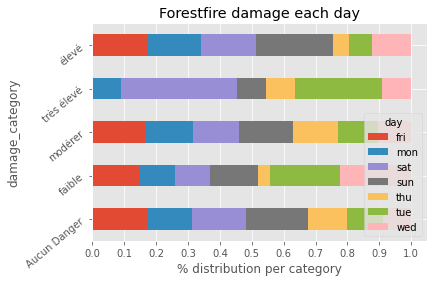

In [16]:
for col in cat_columns:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40)#,cmap='hot'
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

In [18]:
df['u_area'] = np.log(df['area'] + 1)

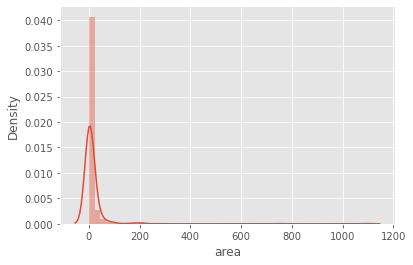

In [19]:
sns.distplot(df['area']);

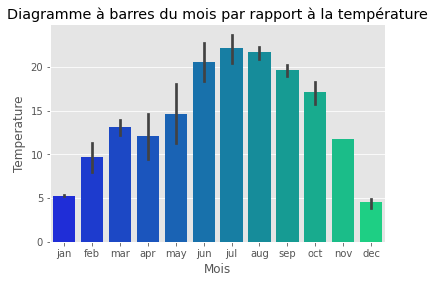

In [21]:
month_temp = sns.barplot(x = 'month', y = 'temp', data = df,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Diagramme à barres du mois par rapport à la température", xlabel = "Mois", ylabel = "Temperature");

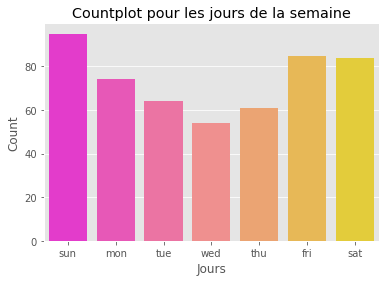

In [22]:
day = sns.countplot(df['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot pour les jours de la semaine', xlabel = 'Jours', ylabel = 'Count');

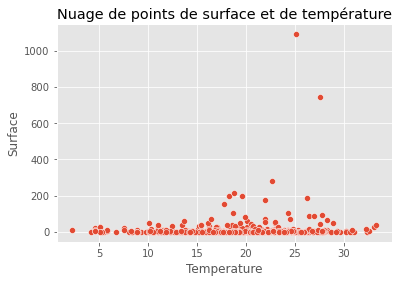

In [23]:
scat = sns.scatterplot(df['temp'], df['area'])
scat.set(title = "Nuage de points de surface et de température", xlabel = "Temperature", ylabel = "Surface");

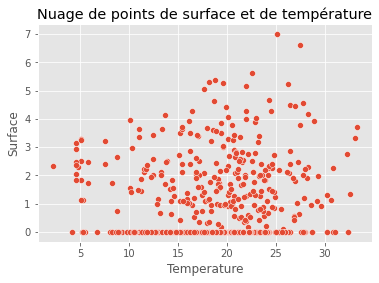

In [24]:
#Avec les valeurs du log
scat = sns.scatterplot(df['temp'], df['u_area'])
scat.set(title = "Nuage de points de surface et de température", xlabel = "Temperature", ylabel = "Surface");

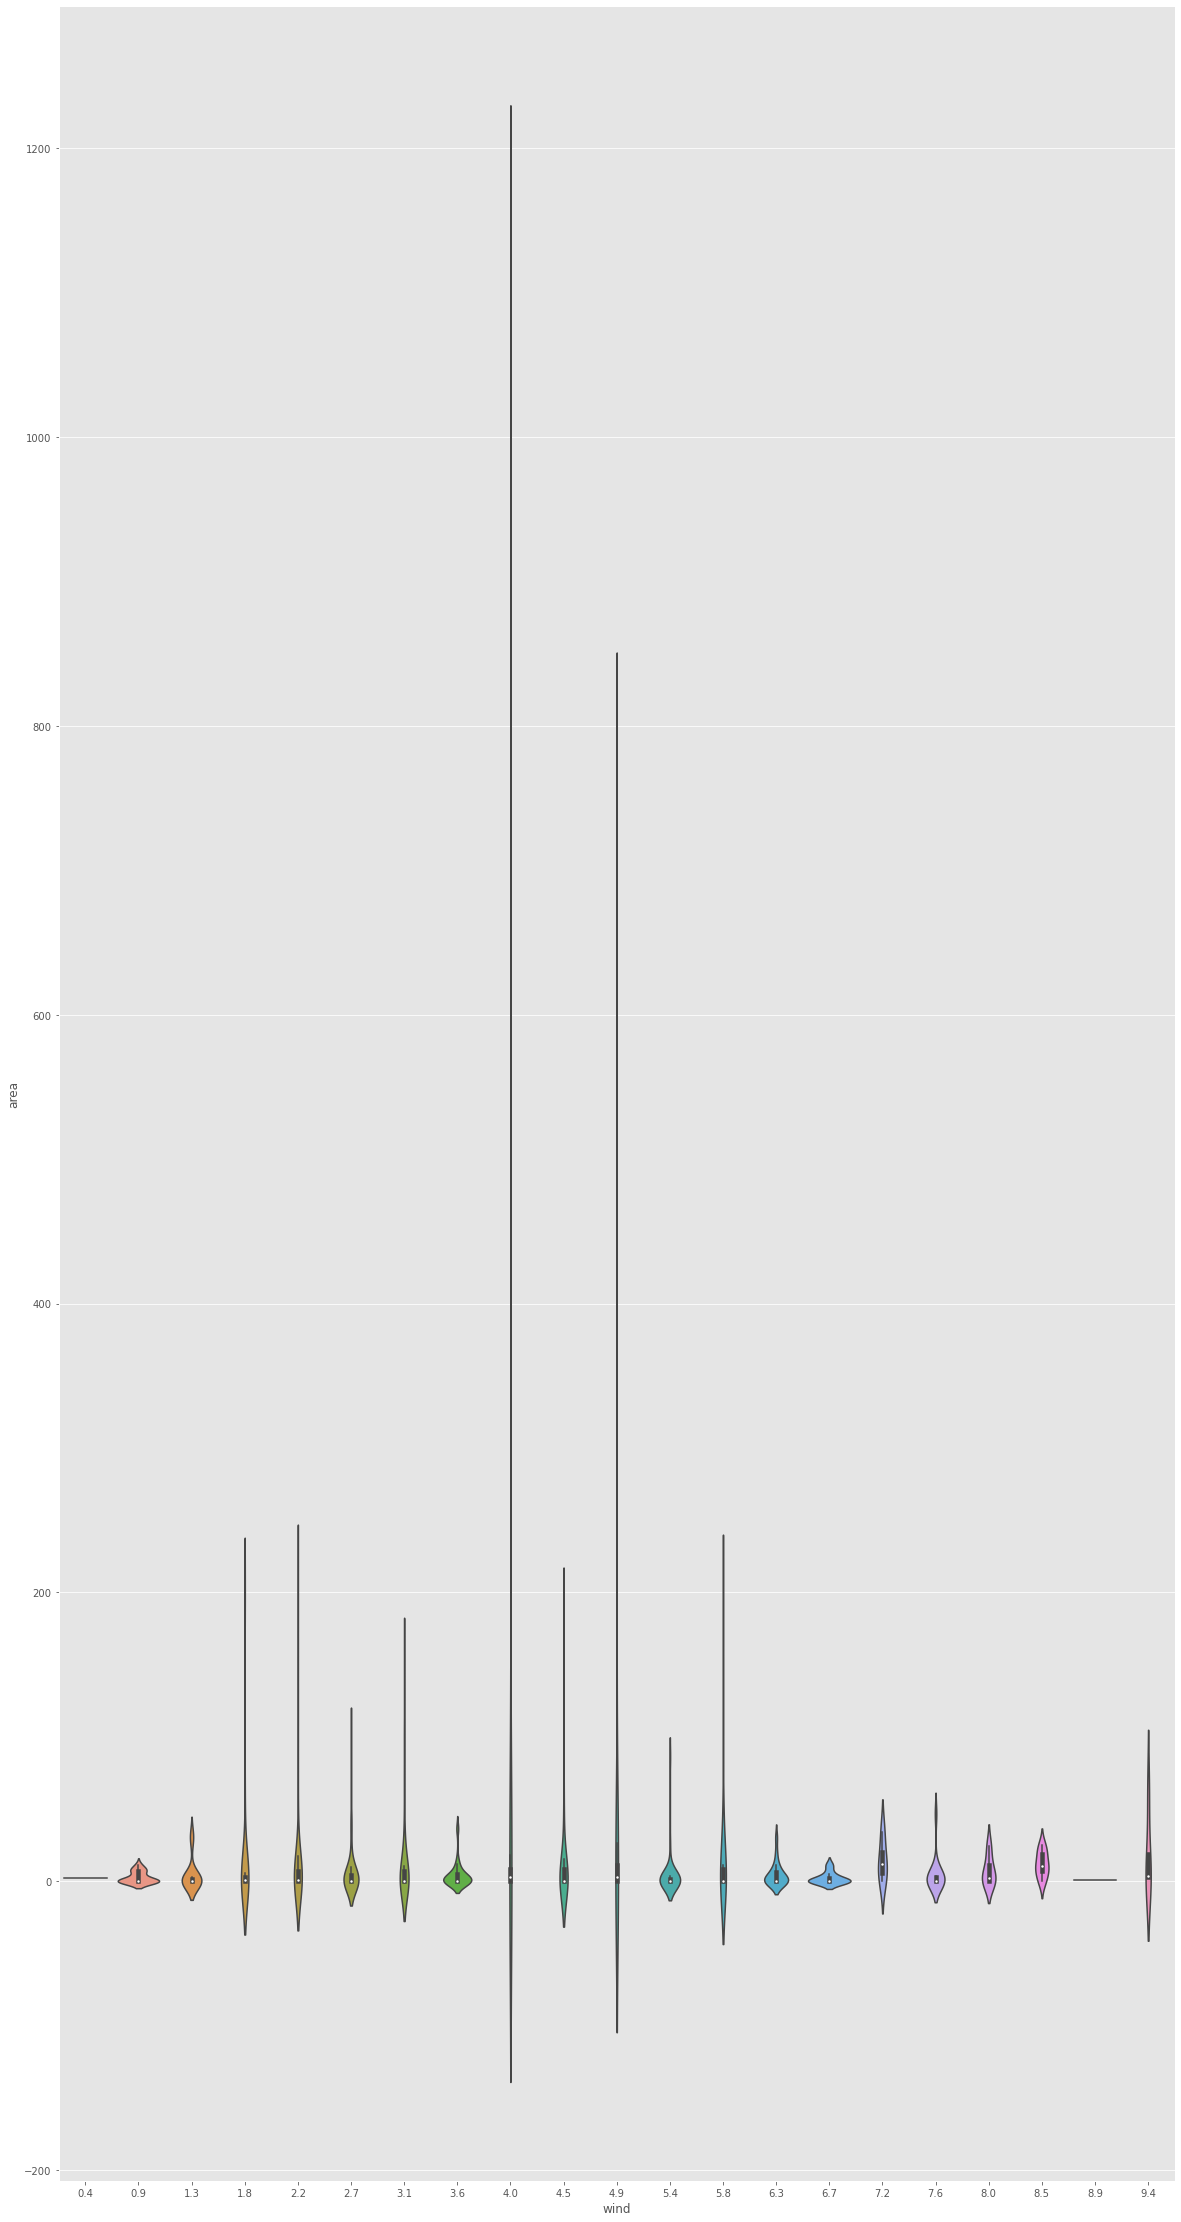

In [25]:
plt.figure(figsize=(20,40))

sns.violinplot(data=df,x=df['wind'],y=target)
    
plt.show()

<Figure size 864x864 with 0 Axes>

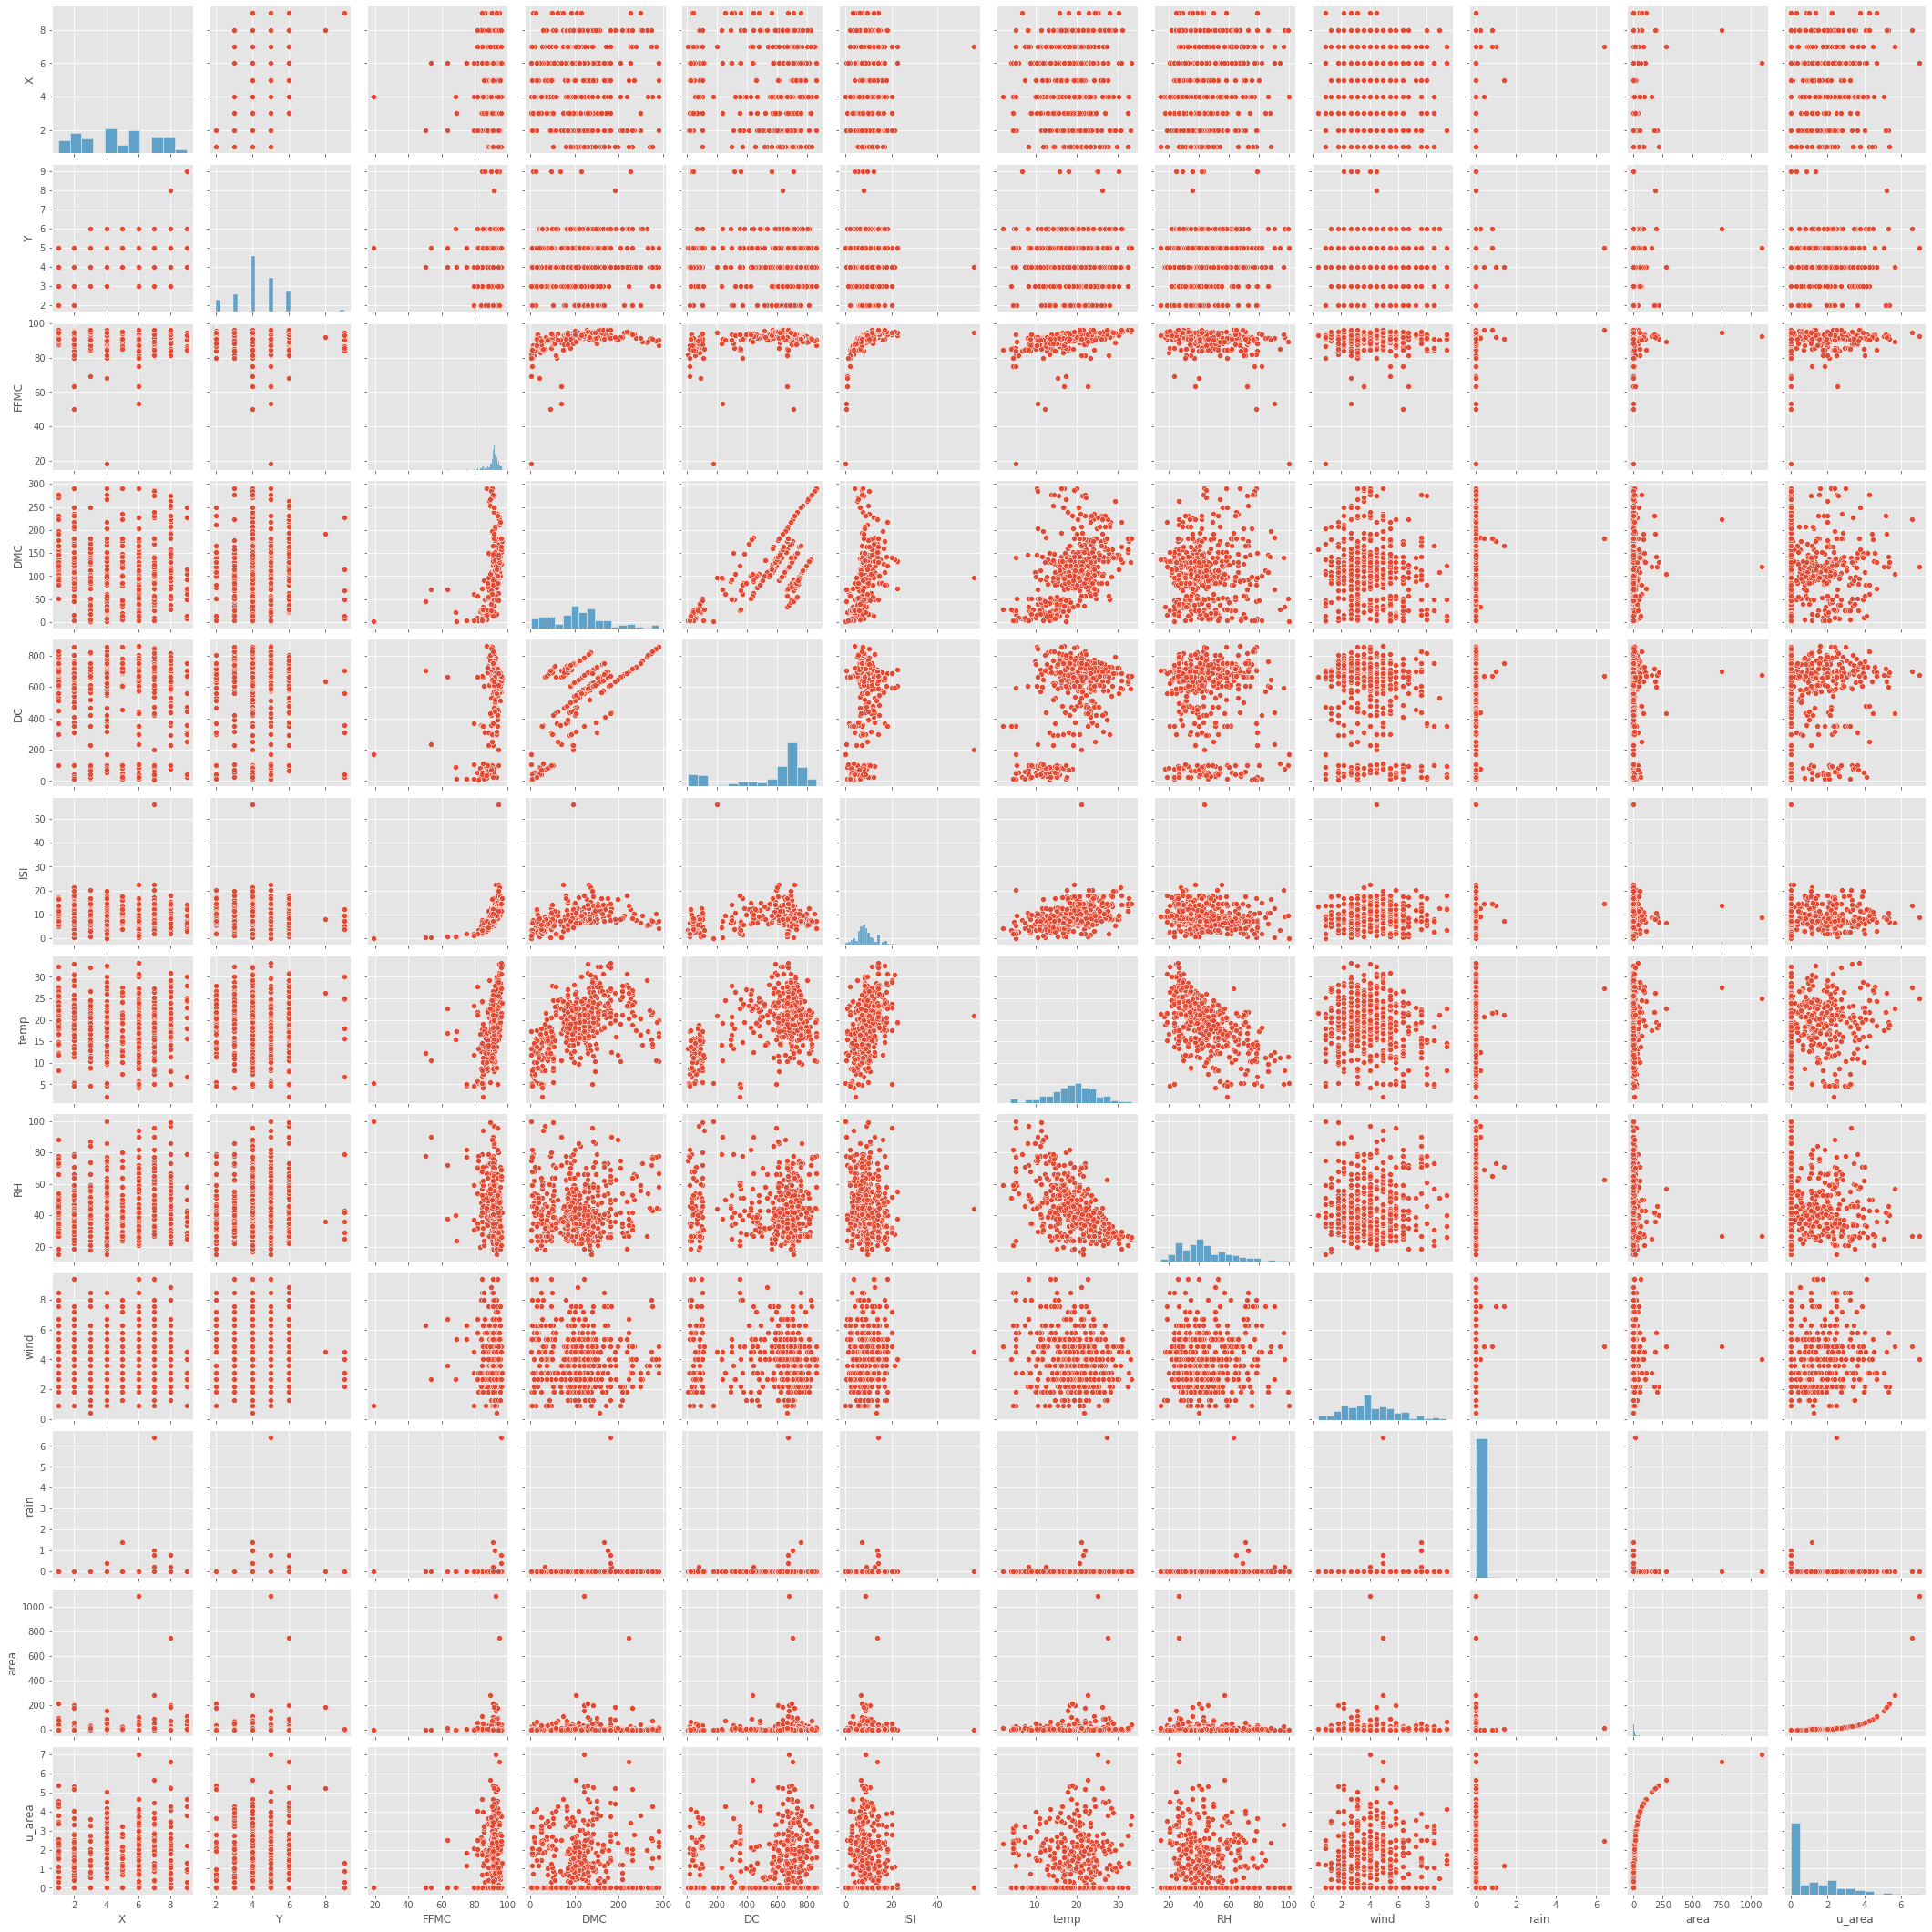

In [26]:
plt.figure(figsize=(12,12))
sns.pairplot(df)

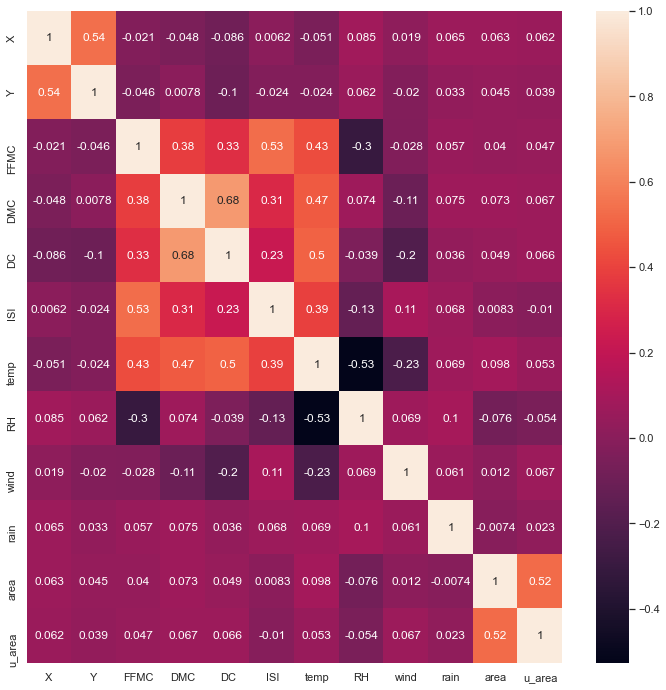

In [27]:
plt.figure(figsize=(12,12))
sns.set(font_scale = 1)
sns.heatmap(df.corr(), annot = True);
plt.show()

In [30]:
#Changer des valeurs catégorielles en valeurs numériques

#Mois
df['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},inplace = True)

#Jours
df['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)

df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category,u_area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,Aucun Dommage,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,Aucun Dommage,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,Aucun Dommage,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,Aucun Dommage,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,Aucun Dommage,0.0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,Aucun Dommage,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,Aucun Dommage,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,Aucun Dommage,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,Aucun Dommage,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,Aucun Dommage,0.0


In [31]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

In [32]:
x = df.drop(columns=['area','damage_category'])
y = df['area']
lr = LinearRegression()
lr.fit(x, y)

print(f'Intercept: {lr.intercept_}')
print(f'R^2 score: {lr.score(x, y)}')
pd.DataFrame({"Coefficients": lr.coef_}, index=x.columns)

Intercept: -9.956977582834801
R^2 score: 0.28563679941132114


,Coefficients
X,0.896572
Y,0.355068
month,-0.739588
day,1.365382
FFMC,-0.228046
DMC,0.039639
DC,-0.003245
ISI,-0.142043
temp,0.767738
RH,-0.080596


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
lrmodel = LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=lrmodel.predict(x_test)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

21.457805109073906
5066.007663648072
71.17589243309895
